# 1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.

In [94]:
#Cargar las librerias necesrias

import pandas as pd # Manejo y análisis de estructuras de datos
import numpy as np # Cálculo numérico y el análisis de datos
import seaborn as sns # Creación gráficos estadísticos
import matplotlib.pyplot as plt # Creación de gráficos en dos dimensiones

# librerías de para implementar modelos de ciencia de datos
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
#from sklearn.linear_model import LinearRegression -> Librería para Regresión Lineal
from sklearn.metrics import classification_report, confusion_matrix

In [95]:
# lectura de datos en Python y lo cargamos en la variable Datos

Datos = pd.read_csv('C:/Users/leidy/Documents/ingenieria de sistemas ivan castro/SEXTO SEMESTRE/Analisis de Datos/actividad 3/Nueva carpeta/heart_cleveland_upload.csv')

In [58]:
# Realizamos lectura de los Datos para el análisis exploratorio

Datos.head(50)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0
5,64,1,0,170,227,0,2,155,0,0.6,1,0,2,0
6,63,1,0,145,233,1,2,150,0,2.3,2,0,1,0
7,61,1,0,134,234,0,0,145,0,2.6,1,2,0,1
8,60,0,0,150,240,0,0,171,0,0.9,0,0,0,0
9,59,1,0,178,270,0,2,145,0,4.2,2,0,2,0


In [96]:
# Descripción de los datos
Datos.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos')

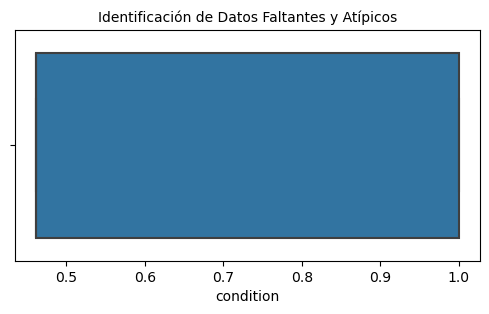

In [128]:
plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['condition'])
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10 )

Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos')

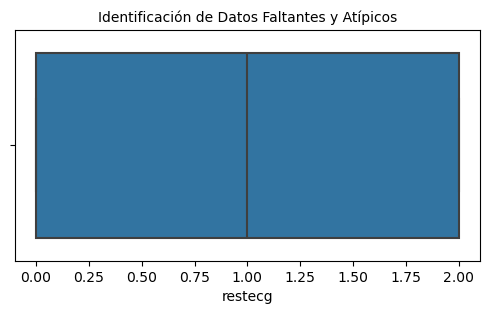

In [98]:
plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['restecg'])
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10)

Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos')

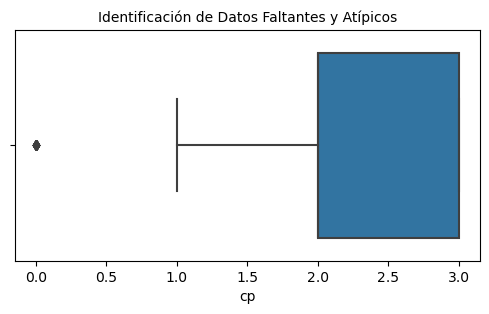

In [99]:
plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['cp'])
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10)

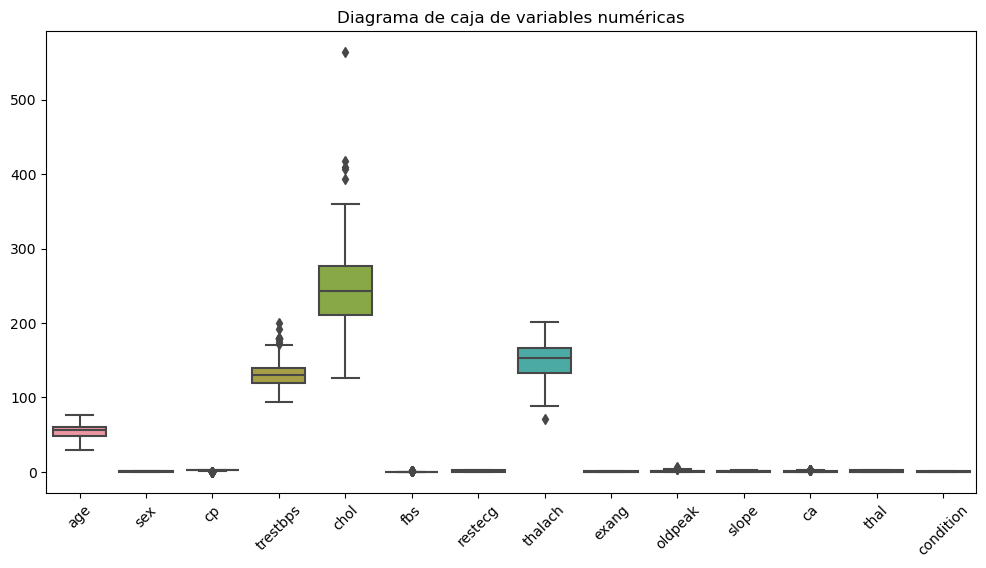

In [100]:
# Identificar valores atípicos

plt.figure(figsize=(12, 6))
sns.boxplot(data = Datos  )
plt.title('Diagrama de caja de variables numéricas')
plt.xticks(rotation=45)
plt.show()

# 2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario

In [101]:
Datos.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


In [102]:
#Revisión de datos faltantes

print("Cantidad de Registros con cero en edad: ",Datos['age'].isin([0]).sum())
print("Cantidad de Registros con cero en sexo: ",Datos['sex'].isin([0]).sum())
print("Cantidad de Registros con cero en tipo de dolor torácico: ",Datos['cp'].isin([0]).sum())
print("Cantidad de Registros con cero en presión arterial en reposo: ",Datos['trestbps'].isin([0]).sum())
print("Cantidad de Registros con cero en colesterol sérico en mg/dl: ",Datos['chol'].isin([0]).sum())
print("Cantidad de Registros con cero en azúcar en sangre en ayunas : ",Datos['fbs'].isin([0]).sum())
print("Cantidad de Registros con cero en Resultados electrocardiográficos en reposo: ",Datos['restecg'].isin([0]).sum())
print("Cantidad de Registros con cero en Frecuencia cardíaca máxima alcanzada: ",Datos['thalach'].isin([0]).sum())
print("Cantidad de Registros con cero en angina inducida por el ejercicio: ",Datos['exang'].isin([0]).sum())
print("Cantidad de Registros con cero en Depresión del ST inducida: ",Datos['oldpeak'].isin([0]).sum())
print("Cantidad de Registros con cero en La pendiente del segmento ST del ejercicio máximo: ",Datos['slope'].isin([0]).sum())
print("Cantidad de Registros con cero en número de vasos principales: ",Datos['ca'].isin([0]).sum())
print("Cantidad de Registros con cero en 3=normal;6=defecto solucionado;7=defecto reversible: ",Datos['thal'].isin([0]).sum())
print("Cantidad de Registros con cero en 0:no enfermedad; 1:enfermedad: ",Datos['condition'].isin([0]).sum())

Cantidad de Registros con cero en edad:  0
Cantidad de Registros con cero en sexo:  96
Cantidad de Registros con cero en tipo de dolor torácico:  23
Cantidad de Registros con cero en presión arterial en reposo:  0
Cantidad de Registros con cero en colesterol sérico en mg/dl:  0
Cantidad de Registros con cero en azúcar en sangre en ayunas :  254
Cantidad de Registros con cero en Resultados electrocardiográficos en reposo:  147
Cantidad de Registros con cero en Frecuencia cardíaca máxima alcanzada:  0
Cantidad de Registros con cero en angina inducida por el ejercicio:  200
Cantidad de Registros con cero en Depresión del ST inducida:  96
Cantidad de Registros con cero en La pendiente del segmento ST del ejercicio máximo:  139
Cantidad de Registros con cero en número de vasos principales:  174
Cantidad de Registros con cero en 3=normal;6=defecto solucionado;7=defecto reversible:  164
Cantidad de Registros con cero en 0:no enfermedad; 1:enfermedad:  160


In [103]:
# Reemplazar todos los ceros con el valor medio (promedio) de la columna.

Datos['sex']=Datos['sex'].replace(0,Datos['sex'].mean())
Datos['cp']=Datos['cp'].replace(0,Datos['cp'].mean())
Datos['fbs']=Datos['fbs'].replace(0,Datos['fbs'].mean())
Datos['restecg']=Datos['restecg'].replace(0,Datos['restecg'].mean())
Datos['exang']=Datos['exang'].replace(0,Datos['exang'].mean())
Datos['oldpeak']=Datos['oldpeak'].replace(0,Datos['oldpeak'].mean())
Datos['slope']=Datos['slope'].replace(0,Datos['slope'].mean())
Datos['ca']=Datos['ca'].replace(0,Datos['ca'].mean())
Datos['thal']=Datos['thal'].replace(0,Datos['thal'].mean())
Datos['condition']=Datos['condition'].replace(0,Datos['condition'].mean())

In [67]:
print("Cantidad de Registros con cero en edad: ",Datos['age'].isin([0]).sum())
print("Cantidad de Registros con cero en sexo: ",Datos['sex'].isin([0]).sum())
print("Cantidad de Registros con cero en tipo de dolor torácico: ",Datos['cp'].isin([0]).sum())
print("Cantidad de Registros con cero en presión arterial en reposo: ",Datos['trestbps'].isin([0]).sum())
print("Cantidad de Registros con cero en colesterol sérico en mg/dl: ",Datos['chol'].isin([0]).sum())
print("Cantidad de Registros con cero en azúcar en sangre en ayunas : ",Datos['fbs'].isin([0]).sum())
print("Cantidad de Registros con cero en Resultados electrocardiográficos en reposo: ",Datos['restecg'].isin([0]).sum())
print("Cantidad de Registros con cero en Frecuencia cardíaca máxima alcanzada: ",Datos['thalach'].isin([0]).sum())
print("Cantidad de Registros con cero en angina inducida por el ejercicio: ",Datos['exang'].isin([0]).sum())
print("Cantidad de Registros con cero en Depresión del ST inducida: ",Datos['oldpeak'].isin([0]).sum())
print("Cantidad de Registros con cero en La pendiente del segmento ST del ejercicio máximo: ",Datos['slope'].isin([0]).sum())
print("Cantidad de Registros con cero en número de vasos principales: ",Datos['ca'].isin([0]).sum())
print("Cantidad de Registros con cero en 3=normal;6=defecto solucionado;7=defecto reversible: ",Datos['thal'].isin([0]).sum())
print("Cantidad de Registros con cero en 0:no enfermedad; 1:enfermedad: ",Datos['condition'].isin([0]).sum())

Cantidad de Registros con cero en edad:  0
Cantidad de Registros con cero en sexo:  0
Cantidad de Registros con cero en tipo de dolor torácico:  0
Cantidad de Registros con cero en presión arterial en reposo:  0
Cantidad de Registros con cero en colesterol sérico en mg/dl:  0
Cantidad de Registros con cero en azúcar en sangre en ayunas :  0
Cantidad de Registros con cero en Resultados electrocardiográficos en reposo:  0
Cantidad de Registros con cero en Frecuencia cardíaca máxima alcanzada:  0
Cantidad de Registros con cero en angina inducida por el ejercicio:  0
Cantidad de Registros con cero en Depresión del ST inducida:  0
Cantidad de Registros con cero en La pendiente del segmento ST del ejercicio máximo:  0
Cantidad de Registros con cero en número de vasos principales:  0
Cantidad de Registros con cero en 3=normal;6=defecto solucionado;7=defecto reversible:  0
Cantidad de Registros con cero en 0:no enfermedad; 1:enfermedad:  0


In [104]:
# IDENTIFICAR DATOS ATIPICOS EN LAS VARIABLES O COLUMNAS 


# Calcula el rango intercuartílico (IQR) para cada columna
Q1 = Datos.quantile(0.25)
Q3 = Datos.quantile(0.75)
IQR = Q3 - Q1

# Define un criterio para identificar valores atípicos
valores_atipicos = (Datos < (Q1 - 1.5 * IQR)) | (Datos > (Q3 + 1.5 * IQR))

# Cuenta la cantidad de valores atípicos en cada columna
valoresatipicos_count = valores_atipicos.sum()
print("Cantidad de valores atípicos en cada columna:")
print(valoresatipicos_count)


Cantidad de valores atípicos en cada columna:
age           0
sex           0
cp            0
trestbps      9
chol          5
fbs          43
restecg       0
thalach       1
exang         0
oldpeak      38
slope        21
ca           58
thal          0
condition     0
dtype: int64


Text(0.5, 1.0, 'Identificación de Datos Atípicos')

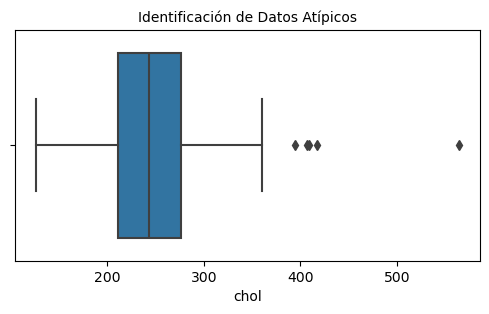

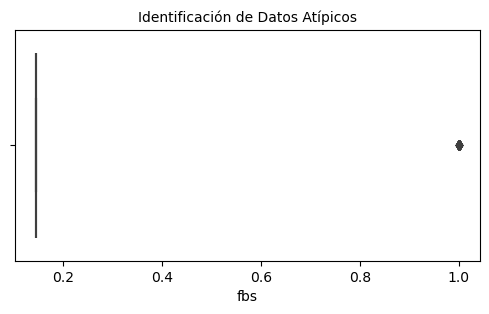

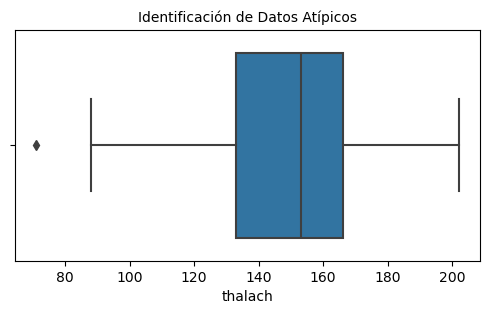

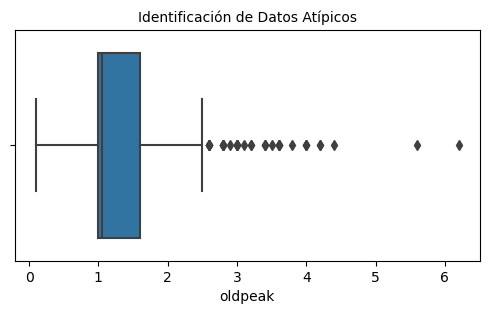

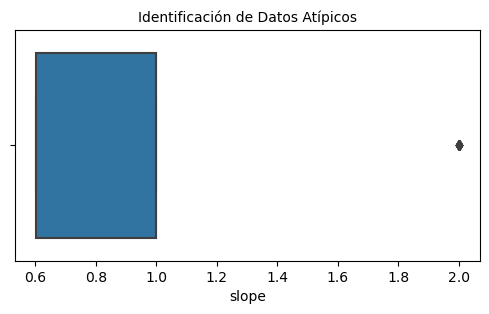

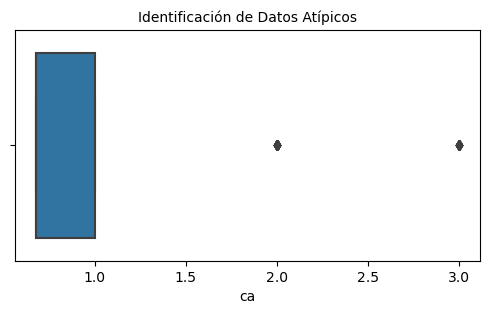

In [105]:
#Identificación de Datos Atípicos

plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['chol'])
plt.title('Identificación de Datos Atípicos', fontsize=10 )

plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['fbs'])
plt.title('Identificación de Datos Atípicos', fontsize=10 )


plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['thalach'])
plt.title('Identificación de Datos Atípicos', fontsize=10 )

plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['oldpeak'])
plt.title('Identificación de Datos Atípicos', fontsize=10 )

plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['slope'])
plt.title('Identificación de Datos Atípicos', fontsize=10 )

plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['ca'])
plt.title('Identificación de Datos Atípicos', fontsize=10 )


# 3.Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características

In [106]:
# Total de personas con Diabetes

Datos['condition'].value_counts()

condition
0.461279    160
1.000000    137
Name: count, dtype: int64

In [107]:
# muestra si hay datos NaN en la variable x 
nan_values_X = X.isna().sum()
print("Valores NaN en las características seleccionadas (X):")
print(nan_values_X)

Valores NaN en las características seleccionadas (X):
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
dtype: int64


In [108]:
Datos[['condition']].head(40)

,condition
0,0.461279
1,0.461279
2,0.461279
3,1.000000
4,0.461279
5,0.461279
6,0.461279
7,1.000000
8,0.461279
9,0.461279


In [113]:
# Binarización
umbral = 0.5
Datos['binario'] = (Datos['condition'] >= umbral).astype(int)

In [119]:
Datos.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    float64
 2   cp         297 non-null    float64
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    float64
 6   restecg    297 non-null    float64
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    float64
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    float64
 11  ca         297 non-null    float64
 12  thal       297 non-null    float64
 13  condition  297 non-null    float64
 14  binario    297 non-null    int32  
dtypes: float64(10), int32(1), int64(4)
memory usage: 33.8 KB


# 4. Dividir el dataset en Train y Test para evaluar correctamente el modelo

In [120]:
# Porcentaje de datos para entrenamiento (train) = 75% , y para prueba (test) = 25%

# Se crean variables X y Y para almacenar la información del entrenamiento

X = Datos.drop('binario',axis=1) # Se cargan los datos de train sin los datos de la columna Diabetico 
Y = Datos['binario'] # Se cargan los datos de train con los datos de la la columna Diabetico

#La función train_test_split crea una división de un conjunto de datos en dos bloques uno de entrenamiento y otro de prueba (train and test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, stratify=Y, random_state= 0)

In [121]:
print (X_train)


     age       sex   cp  trestbps  chol       fbs   restecg  thalach  \
234   56  0.676768  3.0       200   288  1.000000  2.000000      133   
82    66  0.676768  2.0       146   278  0.144781  2.000000      152   
36    56  1.000000  1.0       120   240  0.144781  0.996633      169   
237   56  1.000000  3.0       132   184  0.144781  2.000000      105   
133   47  1.000000  2.0       108   243  0.144781  0.996633      152   
..   ...       ...  ...       ...   ...       ...       ...      ...   
291   40  1.000000  3.0       110   167  0.144781  2.000000      114   
195   61  0.676768  3.0       130   330  0.144781  2.000000      169   
170   65  0.676768  3.0       150   225  0.144781  2.000000      114   
135   46  0.676768  2.0       142   177  0.144781  2.000000      160   
293   39  1.000000  3.0       118   219  0.144781  0.996633      140   

        exang   oldpeak     slope        ca      thal  condition  
234  1.000000  4.000000  2.000000  2.000000  2.000000   1.000000  
8

In [122]:
print (Y_train)


234    1
82     0
36     0
237    1
133    1
      ..
291    1
195    1
170    1
135    0
293    1
Name: binario, Length: 222, dtype: int32


# 5. Entrenar el modelo configurando los diferentes hiperparámetros

In [123]:
# Construir el modelo de regresión logística 

modelo_regresion = LogisticRegression(solver = "liblinear") # liblinear es una libreria para resolver problemas lineales de clasificación y regresión
modelo_regresion.fit(X_train,Y_train)

# Crea el modelo de prediccion
Prediccion = modelo_regresion.predict(X_test) # la función predict predice los valores a partir del conjunto de datos de validación

In [124]:
print (Prediccion)

[1 1 0 0 1 1 1 0 0 0 0 1 1 1 1 1 0 0 0 1 1 0 1 1 0 1 0 0 0 1 0 1 1 0 0 0 0
 0 1 0 0 0 1 0 1 1 1 0 1 1 0 1 0 0 0 0 0 1 1 1 1 0 1 0 1 0 0 1 0 0 0 1 0 0
 1]


# 6. Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc

In [125]:
# Desempeño del modelo de regresión

print(classification_report(Y_test,Prediccion))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        40
           1       0.97      0.97      0.97        35

    accuracy                           0.97        75
   macro avg       0.97      0.97      0.97        75
weighted avg       0.97      0.97      0.97        75



# 7. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo

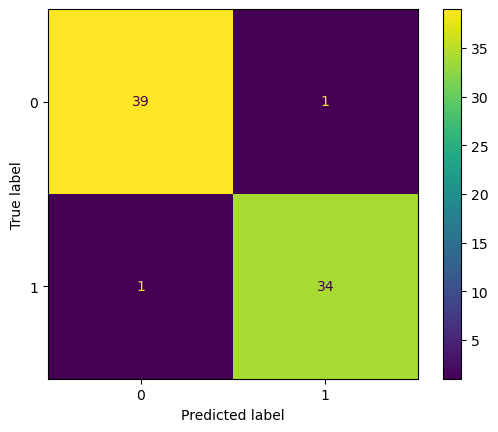

In [126]:
#Matrix de Confusión del modelo

cm=confusion_matrix(Y_test,Prediccion)
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

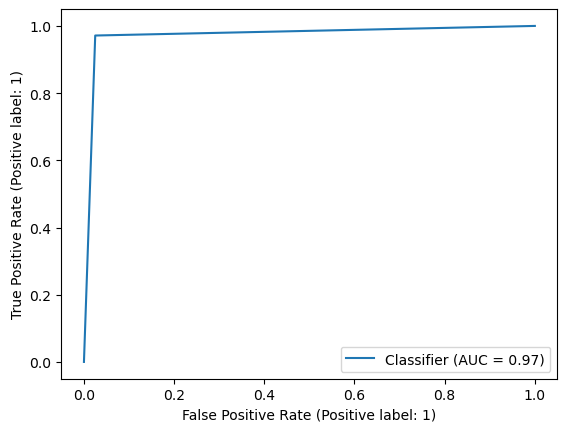

In [127]:
# Curva de precisón del modelo

from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(Y_test, Prediccion)
plt.show()